## Text Classification Project

Information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

Import packages

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

Import data

In [217]:
df = pd.read_csv('../DATA/moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [218]:
print(df['review'].iloc[0])

how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates betwee

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [220]:
df.isna().sum()

label      0
review    35
dtype: int64

In [221]:
df = df.dropna()

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [223]:
df['review'].str.isspace().sum()

27

In [224]:
df = df[~df['review'].str.isspace()]
df['review'].str.isspace().sum()


0

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


Extra check for ''

In [226]:
df[df['review'].apply(lambda review: review == '')]

,label,review


No '' found

In [227]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

### Exploratory data analysis on Bag of Words


In [228]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

matrix = cv.fit_transform(df['review'])

In [229]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])   
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
sorted(freqs, key=lambda x: -x[1])[:20]

Top 20 words used for Negative reviews.


[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

In [230]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
sorted(freqs, key=lambda x: -x[1])[:20]

Top 20 words used for Positive reviews.


[('film', 5002),
 ('movie', 2389),
 ('like', 1721),
 ('just', 1273),
 ('story', 1199),
 ('good', 1193),
 ('time', 1175),
 ('character', 1037),
 ('life', 1032),
 ('characters', 957),
 ('way', 864),
 ('films', 851),
 ('does', 828),
 ('best', 788),
 ('people', 769),
 ('make', 764),
 ('little', 751),
 ('really', 731),
 ('man', 728),
 ('new', 702)]

### Training


In [231]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [232]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [233]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [234]:
pipe.fit(X_train, y_train) 

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [235]:
y_pred = pipe.predict(X_test)

In [236]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, confusion_matrix

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



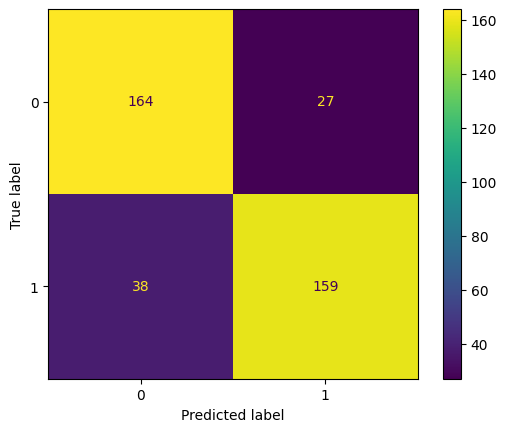

In [238]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();